# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Fall 2018 - TP3 - Machine Learning
## Data processing tutorial with pandas and scikit-learn

## Data preprocessing


The goal of this lab is to follow a simplified version of a complete machine learning project.

1. Data cleaning, missing value processing
2. Formatting data to use in machine learning algorithms
3. Feature engineering  or feature combinations 
4. Performances comparison of the different choices made during data processing


## Scikit-learn
http://scikit-learn.org/stable/

It is a machine learning and data mining library, it offers tools for data analysis and processing, classic machine learning algorithms such as neural networks, logistic regression, SVM or other. Finally tools to compare models between them as cross validation.

## Pandas

A library to store and manipulate data easily

The two basic elements of pandas are the dataframe and the series.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

#### Pandas useful code

Let **df** be a DataFrame
* **pd.read_csv(filename)** load data from csv filr
* **df.head()** display 5 first rows of a dataframe
* **df.info()** show dataframe columns information
* **df = pd.DataFrame(data, columns = [name1,...,namen])** create dataframe while specifying column names
* **df = df.drop(columns = [name1,...,namen])** drop dataframe columns by name
* **df = pd.concat([df1,df2], axis = 1)** concatenate two dataframes on the column axis

* **df = df.astype(float)** convert dataframe data type to float

* **df.corr()** dataframe correlation matrix

## Data leakage



As mentioned in the **train / test set ** part, when you transform the data, you have to learn the transformations on the training set and not on the test set.

For example, let's say that we want to apply **one-hot-encoding** on a **categorical feature** (set of discrete values).

If, when we apply the algorithm on the test set, we come across a new category that was not in the training set, we should not create a new category in the **one-hot encoding** algorithm. Otherwise the **training pipeline** knows data from the test set , that's **data leakage**

One solution is to have previously added an "unknown" class during the training.

## Common feature types and associated transformations with sklearn

To present the usual transformations with sklearn, we will use a basic example. Let's create a DataFrame, containing four features(columns):
* A categorical text (a discrete set of textual values)
* A numerical categorical (a discrete set of integer values)
* Two continuous numeric (any real number)

In [1]:
import numpy as np
import pandas as pd

toy_data = [["certainly yes",1,np.nan,2153.5],
            ["maybe yes",1,0.5,5361.2],
            ["certainly no",3,6.3,6945.3],
            [np.nan,2,2.1,3215.2],
            ["certainly yes",np.nan,0.12,9856.1],
            ["maybe yes",1,6.9,4561.2],
            ["maybe no",np.nan,13.0,9453.7],
            ["certainly yes",np.nan,0.23,3125.0],
            ["maybe yes",3,5.2,2547.4,],
            ["maybe no",np.nan,2.0,np.nan],
           ]
column_names = ["textual","categorical","numerical_small","numerical_high"]
toy_dataframe = pd.DataFrame(toy_data, columns = column_names)

##### Split train/test set

In [2]:
from sklearn.model_selection import train_test_split
toy_train, toy_test= train_test_split(toy_dataframe, test_size=0.2, random_state=42)
toy_train,toy_test = toy_train.reset_index(drop = True), toy_test.reset_index(drop = True)

In [3]:
toy_train.head(10)

textual  categorical  numerical_small  numerical_high
0      maybe yes          1.0             6.90          4561.2
1  certainly yes          1.0              NaN          2153.5
2  certainly yes          NaN             0.23          3125.0
3   certainly no          3.0             6.30          6945.3
4       maybe no          NaN             2.00             NaN
5  certainly yes          NaN             0.12          9856.1
6            NaN          2.0             2.10          3215.2
7       maybe no          NaN            13.00          9453.7

In [4]:
toy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
textual            7 non-null object
categorical        4 non-null float64
numerical_small    7 non-null float64
numerical_high     7 non-null float64
dtypes: float64(3), object(1)
memory usage: 328.0+ bytes


As you can see, this dataframe can not be used with standard machine learning algorithms.
The main problems are:
* Columns contain null values (NaN)
* The first column is textual
* The last two columns are not standardized.
* The second column is not one-hot encoded


##### Standardization importance

Standardization makes it possible to express the column as a normal distribution of 0 mean and  variance 1,(values between -1 and 1). The interest of thus reducing the features is to put them all **on the same scale**. Some classification algorithms will tend to consider the column **numerical_small** as negligible compared to the column **numerical_high**, and thus to ignore it **when learning **.


##### One-hot-encoding importance

A categorical feature can take a small number of integer values. For example, the column **categorical** contains values in the set [1,2,3].
The semantics behind this representation are as follows: for each example (line) of the dataset, we associate a category among the possible categories ([1,2,3]).

Nevertheless, some machine learning algorithms will tend to take into account the numerical order of these categories.
That is to say, take into account the fact that 2 is after 1, whereas this relation does not make sense in this case.
To overcome this problem, we use the one-hot-encoding seen in the first part.

Thus, we will replace a categorical feature that can take 3 different values, by 3 categorical features that can take the values 0 or 1.

##### Missing values
For missing values, the Sklearn SimpleImputer object can be used.
SimpleImputer is a **transformer**, it is provided with two methods:
* fit: allows to learn the transformation to perform
* transform: allows to apply the transformation to perform
* fit_transform: apply the two previous methods as a result

**Note: To avoid data leakage, use fit_transfom on the training set and transform on the test set (see the following example)**

In [5]:
from sklearn.impute import SimpleImputer

# Imputers initialisation
textual_imputer = SimpleImputer(strategy = 'constant', fill_value = 'maybe yes')
categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 1.0)
small_imputer = SimpleImputer(strategy = 'mean')
high_imputer = SimpleImputer(strategy = 'mean')

In [6]:
#Train set
toy_train["textual"] = textual_imputer.fit_transform(toy_train["textual"].values.reshape(-1,1))
toy_train["categorical"] = categorical_imputer.fit_transform(toy_train["categorical"].values.reshape(-1,1))
toy_train["numerical_small"] = small_imputer.fit_transform(toy_train["numerical_small"].values.reshape(-1,1))
toy_train["numerical_high"] = high_imputer.fit_transform(toy_train["numerical_high"].values.reshape(-1,1))

In [7]:
#Test set
toy_test["textual"] = textual_imputer.transform(toy_test["textual"].values.reshape(-1,1))
toy_test["categorical"] = categorical_imputer.transform(toy_test["categorical"].values.reshape(-1,1))
toy_test["numerical_small"] = small_imputer.transform(toy_test["numerical_small"].values.reshape(-1,1))
toy_test["numerical_high"] = high_imputer.transform(toy_test["numerical_high"].values.reshape(-1,1))

In [8]:
toy_train.head()

textual  categorical  numerical_small  numerical_high
0      maybe yes          1.0         6.900000     4561.200000
1  certainly yes          1.0         4.378571     2153.500000
2  certainly yes          1.0         0.230000     3125.000000
3   certainly no          3.0         6.300000     6945.300000
4       maybe no          1.0         2.000000     5615.714286

#### Features transformation

##### Textual

This pandas command is used to observe the different possible values for a feature, as well as their proportion.

In [9]:
(toy_train["textual"].value_counts()/len(toy_train))[:10]

certainly yes    0.375
maybe yes        0.250
maybe no         0.250
certainly no     0.125
Name: textual, dtype: float64

By observing the distribution of the values taken by this column, several decisions can be made:
* Express this variable as a categorical variable that can take values [0,1,2,3].
* Separate the column into two columns, **certain** and **positive** each of which can take the values [0,1].

As part of the demonstration, we will choose the second option.

It is possible to define custom functions to apply on a column. We then use the **apply** method of the dataframe combined with the use of **lambda expression**.

In [10]:
#Custom functions
def parse_certain(text):
    certain, _ = text.split(" ")
    return certain

def parse_positif(text):
    _, positif = text.split(" ")
    return positif

In [11]:
# Train set
certain_train = toy_train.apply(lambda row: pd.Series(  parse_certain(row["textual"])  ), axis = 1  )
positif_train = toy_train.apply(lambda row: pd.Series(  parse_positif(row["textual"])  ), axis = 1  )

certain_train.columns = ["certain"]
positif_train.columns = ["positif"]

new_columns = pd.concat([certain_train,positif_train], axis = 1)
toy_train = toy_train.drop(columns = ["textual"])
toy_train = pd.concat([toy_train,pd.DataFrame(new_columns)], axis = 1)

# Test set
certain_test = toy_test.apply(lambda row: pd.Series(  parse_certain(row["textual"])  ), axis = 1  )
positif_test = toy_test.apply(lambda row: pd.Series(  parse_positif(row["textual"])  ), axis = 1  )

certain_test.columns = ["certain"]
positif_test.columns = ["positif"]

new_columns = pd.concat([certain_test,positif_test], axis = 1)
toy_test = toy_test.drop(columns = ["textual"])
toy_test = pd.concat([toy_test,pd.DataFrame(new_columns)], axis = 1)

In [12]:
toy_train.head()

categorical  numerical_small  numerical_high    certain positif
0          1.0         6.900000     4561.200000      maybe     yes
1          1.0         4.378571     2153.500000  certainly     yes
2          1.0         0.230000     3125.000000  certainly     yes
3          3.0         6.300000     6945.300000  certainly      no
4          1.0         2.000000     5615.714286      maybe      no

#### Label encoder

The transformation worked, however the two new columns are still not usable in a machine learning algorithm. The sklearn **LabelEncoder** can convert these columns into categorical numerical columns.

In [13]:
from sklearn.preprocessing import LabelEncoder

# encoder initialisation
certain_label = LabelEncoder()
positif_label = LabelEncoder()


#Train set
toy_train["certain"] = certain_label.fit_transform(toy_train["certain"].values)
toy_train["positif"] = positif_label.fit_transform(toy_train["positif"].values)

#Test set
toy_test["certain"] = certain_label.transform(toy_test["certain"].values.reshape(-1,1))
toy_test["positif"] = positif_label.transform(toy_test["positif"].values.reshape(-1,1))

/home/laurent/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
toy_train.head()

categorical  numerical_small  numerical_high  certain  positif
0          1.0         6.900000     4561.200000        1        1
1          1.0         4.378571     2153.500000        0        1
2          1.0         0.230000     3125.000000        0        1
3          3.0         6.300000     6945.300000        0        0
4          1.0         2.000000     5615.714286        1        0

##### Categorical

For this column, we will only apply one-hot-encoding.

In [15]:
from sklearn.preprocessing import OneHotEncoder

# encoder initialisation
categorical_encoder = OneHotEncoder(categories = 'auto', sparse = False)

#Train set
new_columns_train = categorical_encoder.fit_transform(toy_train["categorical"].values.reshape(-1,1))
toy_train = toy_train.drop(columns=["categorical"])
toy_train = pd.concat([toy_train,pd.DataFrame(new_columns_train)], axis = 1)


#Test set
new_columns_test = categorical_encoder.transform(toy_test["categorical"].values.reshape(-1,1))

toy_test = toy_test.drop(columns=["categorical"])
toy_test = pd.concat([toy_test,pd.DataFrame(new_columns_test)], axis = 1)



##### Numerical small and Numerical high

We will only standardize these columns

In [16]:
from sklearn.preprocessing import StandardScaler

# Scalers initialisation
small_scaler = StandardScaler()
high_scaler = StandardScaler()

#Train set
toy_train["numerical_small"] = small_scaler.fit_transform(toy_train["numerical_small"].values.reshape(-1,1))
toy_train["numerical_high"] = high_scaler.fit_transform(toy_train["numerical_high"].values.reshape(-1,1))

#Test set
toy_test["numerical_small"] = small_scaler.transform(toy_test["numerical_small"].values.reshape(-1,1))
toy_test["numerical_high"] = high_scaler.transform(toy_test["numerical_high"].values.reshape(-1,1))

In [17]:
toy_train.head()

numerical_small  numerical_high  certain  positif    0    1    2
0         0.624113   -3.865262e-01        1        1  1.0  0.0  0.0
1         0.000000   -1.269055e+00        0        1  1.0  0.0  0.0
2        -1.026869   -9.129572e-01        0        1  1.0  0.0  0.0
3         0.475599    4.873521e-01        0        0  0.0  0.0  1.0
4        -0.588752   -3.333701e-16        1        0  1.0  0.0  0.0

## Pipeline

The resulting dataset is usable for learning, and as we applied the transformations on the test set we can evaluate the performance of the algorithm on it.

However, the current implementation is tedious and redundant. Indeed, it requires a lot of copy-paste.

On the other hand, if we wanted to make a change in the data processing process and test its impact on performance, we would have to restart everything manually without forgetting anything.

A solution exists in **sklearn** to alleviate this problem, the **pipeline**.

It allows to list the transformations we want to apply by column and to apply them all at once.

Below, the same data preprocessing but this time using the pipeline.

In [18]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

#textual
pipeline_certain = Pipeline([
    ('certain', TransformationWrapper(transformation = parse_certain)),
    ("encode",LabelEncoderP()),
])

pipeline_positif = Pipeline([
    ('positif', TransformationWrapper(transformation = parse_positif)),
    ("encode",LabelEncoderP()),
    
])

pipeline_textual_u = Pipeline([
    ("textual", SimpleImputer(strategy = 'constant', fill_value = 'maybe yes')),
    
    ('feats', FeatureUnion([
        ('certain', pipeline_certain), 
        ('positif', pipeline_positif) 
    ])),

])

# categorical
pipeline_categorical = Pipeline([
    ("fillna", SimpleImputer(strategy = 'constant', fill_value = 1.0) ),
    ("encode",OneHotEncoder(categories = 'auto', sparse = False))
])

# numerical
pipeline_numerical = Pipeline([
    ("fillna", SimpleImputer(strategy = 'mean') ),
    ("scaler",StandardScaler())
])

full_pipeline = ColumnTransformer([
        ("textual", pipeline_textual_u, ["textual"]),
        ("categorical", pipeline_categorical, ["categorical"]),
        ("numerical small", pipeline_numerical, ["numerical_small"]),
        ("numerical high", pipeline_numerical, ["numerical_high"]),
    ])

In [22]:
toy_test

textual  categorical  numerical_small  numerical_high
0  maybe yes          3.0              5.2          2547.4
1  maybe yes          1.0              0.5          5361.2

In [25]:
toy_train, toy_test= train_test_split(toy_dataframe, test_size=0.2, random_state=42)
toy_train,toy_test = toy_train.reset_index(drop = True), toy_test.reset_index(drop = True)

In [26]:
columns = ["certain","positif","cat0", "cat1","cat2","numerical small","numerical high"]

toy_train = pd.DataFrame(full_pipeline.fit_transform(toy_train),columns= columns)
toy_test = pd.DataFrame(full_pipeline.transform(toy_test),columns= columns)

In [29]:
toy_train.head()

certain  positif  cat0  cat1  cat2  numerical small  numerical high
0      1.0      1.0   1.0   0.0   0.0         0.624113   -3.865262e-01
1      0.0      1.0   1.0   0.0   0.0         0.000000   -1.269055e+00
2      0.0      1.0   1.0   0.0   0.0        -1.026869   -9.129572e-01
3      0.0      0.0   0.0   0.0   1.0         0.475599    4.873521e-01
4      1.0      0.0   1.0   0.0   0.0        -0.588752   -3.333701e-16

As you can see, the code using the pipeline is much more compact and easy to modify.
Moreover it runs in one line, using **pipeline.fit_transform()** and the transformations can be applied in one line on the test set without data leakage with **pipeline.transform()**.

#### Pipeline code explaination

##### Pipeline

This is a list of operations. Each operation is represented by a tuple as follow:

**(transformation name, transformer(parameters))**

##### ColumnTransformer

Allows you to select the columns on which to apply a transformation. The transformation can be a simple transformer or a pipeline. This is a suite of tuples as follow:

**(transformation name, transformer(parameters) or pipeline_name, [columns to be transformed])**

##### TransformationWrapper

This is a class implemented specifically for the lab, it allows to apply user-defined functions in the pipeline.

This object is a **transformer**, so it has a **fit** method and a **transform** method like every sklearn transform.

It takes two parameters:
* **fitation**: the function used to learn the transformation to perform, it takes as input a dataframe and returns a list containing the parameters or data learned
* **transformation**: the function that applies the transformation, **it takes as input a row of the column to be processed**, and returns the resulting value of the transformation. Optionally, it can take a second input argument, the list returned by the given function in the **fitation** parameter.


For example: **("parse", TransformationWrapper(fitation = get_train_colors, transformation = parse_color))**

#####  LabelEncoderP

In Sklearn 20.0 the **LabelEncoder** Transformer introduced earlier in the tutorial is unusable in the pipeline, **LabelEncoderP** is just an overload that allows you to use this transform in the pipeline.
It has the same fonctionnalities.

## Looking at the data

DataFrame n first rows

In [31]:
toy_dataframe.head(5)

textual  categorical  numerical_small  numerical_high
0  certainly yes          1.0              NaN          2153.5
1      maybe yes          1.0             0.50          5361.2
2   certainly no          3.0             6.30          6945.3
3            NaN          2.0             2.10          3215.2
4  certainly yes          NaN             0.12          9856.1

Data types and missing values ​​by column

In [32]:
toy_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
textual            9 non-null object
categorical        6 non-null float64
numerical_small    9 non-null float64
numerical_high     9 non-null float64
dtypes: float64(3), object(1)
memory usage: 392.0+ bytes


Number of null values per column

In [33]:
toy_dataframe.isnull().sum()

textual            1
categorical        4
numerical_small    1
numerical_high     1
dtype: int64

Different values and number of different values for a column

In [42]:
(toy_dataframe["categorical"].value_counts())

1.0    3
3.0    2
2.0    1
Name: categorical, dtype: int64

Number of different values for a column

In [37]:
toy_dataframe["categorical"].nunique()

3

Display data distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44766d8d50>,
      dtype=object)

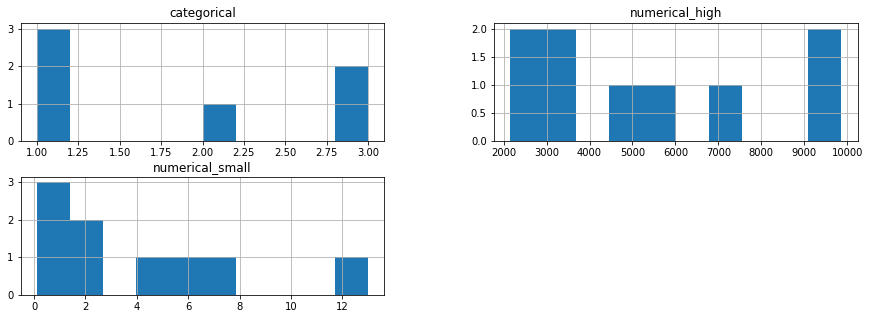

In [41]:
toy_dataframe.hist(figsize=(15,5))